# Phase1 Project: Aviation Accidents Data Analysis and Insights

## Overview
The project seeks to explore data on different airplanes accidents in order to advise company stakeholders on which type of airplane to choose for business as they would like to join this industry. The dataset is from kaggle and it contains information covering United States, its territories and international waters from 1962 and later on selected incidents.

## Business
The company is seeking to start a new business endeavor, operating airplanes for commercial and private enterprises, in which they are novice to it. The stakeholders are seeking to understand what type of aircrafts have low risk to accidents from prevoius occurences. 

The dataset has various incidents since 1962. The information on the database is on continual update once an incident happens. Using this data would help identify the patterns/trends on these occurences. 

At the end of the data analysis, getting airplanes types which have minimal or no accidents and any other factors that may affect the purchase, this would make the best fit for recommendation thus aid in making decisions on which type of airplane to purchase.


## Data
Let's check what the data is about. We will use python methods and its libraries to explore the data.

In [97]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
#Open and reeding the datasets
aviation_df = pd.read_csv("AviationData.csv", encoding='cp1252')
usstate_df = pd.read_csv("USState_Codes.csv", encoding='cp1252')

In [100]:
#get top 5 rows of aviation data
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


From the first five records, we see that there are some null values.

In [101]:
# Get the shape of the data, rows and columns
aviation_df.shape

(88889, 31)

In [102]:
#get information about the data, including the datatypes of respective columns
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [103]:
#check if there are null values
aviation_df.isna().sum().sort_values()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Make                         63
Model                        92
Amateur.Built               102
Country                     226
Injury.Severity            1000
Registration.Number        1317
Aircraft.damage            3194
Weather.Condition          4492
Total.Uninjured            5912
Number.of.Engines          6084
Purpose.of.flight          6192
Report.Status              6381
Engine.Type                7077
Total.Fatal.Injuries      11401
Total.Minor.Injuries      11933
Total.Serious.Injuries    12510
Publication.Date          13771
Broad.phase.of.flight     27165
Airport.Name              36099
Airport.Code              38640
Latitude                  54507
Longitude                 54516
Aircraft.Category         56602
FAR.Description           56866
Air.carrier               72241
Schedule                  76307
dtype: i

In [104]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


From the above data, we can see aviation dataset has 88,889 rows with 35 columns. It gives info on airplane type, location, country where the incident occured, information about the airplane, dates, etc.

There are missing data from the null values seen in the data. The dataset has numbers on injuries - fatal, seroius or minor ones, and number of engines of the airplane.

In [105]:
##get top 5 rows of USState Codes data
usstate_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [106]:
usstate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [107]:
usstate_df.shape

(62, 2)

In [108]:
#Check the columns in the aviation publish_display_data
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [109]:
usstate_df.value_counts() #

US_State       Abbreviation
Wyoming        WY              1
Idaho          ID              1
Minnesota      MN              1
Micronesia     FM              1
Michigan       MI              1
                              ..
New Mexico     NM              1
New Jersey     NJ              1
New Hampshire  NH              1
Nevada         NV              1
Alabama        AL              1
Length: 62, dtype: int64

In [110]:
usstate_df.isna().sum()

US_State        0
Abbreviation    0
dtype: int64

The data from USState codes contains 62 rows, showing 62 states and 2 columns showing the States involved and the respective codes.
There are no null values

In [120]:
#let us check if the data has columns that have similar content on both aviation and usstate codes
usstate_df['US_State'].isin(aviation_df['Country']).value_counts()


False    54
True      8
Name: US_State, dtype: int64

## Data Preparation
Let us prepare the data for analysis. This will/may involve handling missing values in the data, dropping unnecessary columns, selecting needed data, etc.

We start by checking the essential columns and dropping the unnecessary ones.

1. Then we rename the columns to be easy handling by removing dots on column names

2. check null values and see how to handle them, drop, replace by mode , mean or median.
As noticed earlier, there are only 4 columns without null values in the aviation data i.e.:

        1. 'Event.Id' 
        2. 'Investigation.Type'
        3. 'Accident.Number'
        4. 'Event.Date'

In [121]:
#First let us make a copy of the data
aviation_df_copy = aviation_df.copy(deep=True)

To determine the low risk aircraft, it needs specific kind of data such as the model, make, category, engine type, level of damage, number of injuries, etc.

Columns such as Event Id, Investigation Type, Accident Number, etc. may not be useful. So we will drop these columns

In [122]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [123]:
#droping columns
aviation_df.drop(["Event.Id","Investigation.Type", "Accident.Number", "Event.Date", "Airport.Code", "Airport.Name", "Air.carrier", "Schedule"], axis=1,inplace = True)
aviation_df.head()

,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,...,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,...,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,"Saltville, VA",United States,36.9222,-81.8781,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,...,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,...,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [124]:
aviation_df.tail()

,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,"Annapolis, MD",United States,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,...,091,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,"Payson, AZ",United States,341525N,1112021W,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,...,091,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,...,091,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,"Athens, GA",United States,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,...,091,Personal,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [125]:
aviation_df.columns

Index(['Location', 'Country', 'Latitude', 'Longitude', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'FAR.Description', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

If you check, the column names have a '.' separator between 2 names. We can remove the dot for each column name.
Then we can strip of any empty spaces in the data.

In [179]:
#Let us remove the dot(.) in the column names
#First create a dictionary with key-value pairs consisting of old names as keys and new names as keys
#create keys append them to an empty list
colmn_names_orig = []
for colmn in aviation_df.columns:
    colmn_names_orig.append(colmn)
len(colmn_names_orig)


23

In [186]:
#Create values
colmn_names_new = []
#remove the '.' from column names and append to an empty list
for x in range(len(aviation_df.columns)):
    new_column_name = aviation_df.columns[x].replace('.', '')
    colmn_names_new.append(new_column_name)

#type(colmn_names_new)
len(colmn_names_new)

23

In [185]:
colmn_names_dict = dict(zip(colmn_names_orig, colmn_names_new))
#colmn_names_dict

In [188]:
#Rename the columns
aviation_df.rename(colmn_names_dict, axis='columns', inplace=True)

In [189]:
aviation_df.dtypes

Location                 object
Country                  object
Latitude                 object
Longitude                object
InjurySeverity           object
Aircraftdamage           object
AircraftCategory         object
RegistrationNumber       object
Make                     object
Model                    object
AmateurBuilt             object
NumberofEngines         float64
EngineType               object
FARDescription           object
Purposeofflight          object
TotalFatalInjuries      float64
TotalSeriousInjuries    float64
TotalMinorInjuries      float64
TotalUninjured          float64
WeatherCondition         object
Broadphaseofflight       object
ReportStatus             object
PublicationDate          object
dtype: object

## Dealing with the null values
Let us check null values on different columns

In [197]:
aviation_df.isna().sum()

Location                   52
Country                   226
Latitude                54507
Longitude               54516
InjurySeverity           1000
Aircraftdamage           3194
AircraftCategory        56602
RegistrationNumber       1317
Make                       63
Model                      92
AmateurBuilt              102
NumberofEngines          6084
EngineType               7077
FARDescription          56866
Purposeofflight          6192
TotalFatalInjuries      11401
TotalSeriousInjuries    12510
TotalMinorInjuries      11933
TotalUninjured           5912
WeatherCondition         4492
Broadphaseofflight      27165
ReportStatus             6381
PublicationDate         13771
dtype: int64

In [206]:
aviation_df['Make'].value_counts().head(20)

Cessna               22227
Piper                12029
CESSNA                4922
Beech                 4330
PIPER                 2841
Bell                  2134
Boeing                1594
BOEING                1151
Grumman               1094
Mooney                1092
BEECH                 1042
Robinson               946
Bellanca               886
Hughes                 795
Schweizer              629
Air Tractor            595
BELL                   588
Mcdonnell Douglas      526
Aeronca                487
Maule                  445
Name: Make, dtype: int64

In [209]:
aviation_df['Model'].value_counts().head(20)

152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
PA-18         581
PA-18-150     578
PA-28-180     572
PA-28-161     569
PA-28-181     532
206B          524
737           489
PA-38-112     469
150L          461
G-164A        460
Name: Model, dtype: int64

In [225]:
new_df = aviation_df[['Make','Model']].value_counts().head(20)
new_df
#cessnam = aviation_df['Make'].loc["Cessna"]

Make    Model    
Cessna  152          2168
        172          1254
        172N          996
Piper   PA-28-140     812
Cessna  150           716
        172M          667
        172P          597
        150M          539
Piper   PA-18         539
        PA-28-161     502
        PA-28-180     499
CESSNA  172           499
Cessna  180           494
Piper   PA-28-181     476
Cessna  182           464
Piper   PA-38-112     444
        PA-18-150     437
BOEING  737           435
Bell    206B          421
Cessna  150L          410
dtype: int64

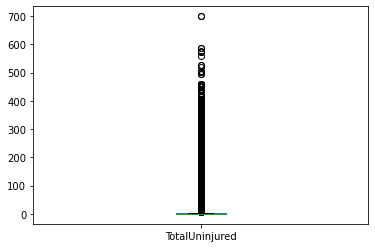

In [194]:
aviation_df.boxplot(column =['TotalUninjured'], grid = False)
#plt.title("Model outlier")
#plt.xlabel("model x axis")
#plt.ylabel("model y axis")
plt.show()